# Linear regression and polynomic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline
#Hide warnings
import warnings
warnings.filterwarnings('ignore')

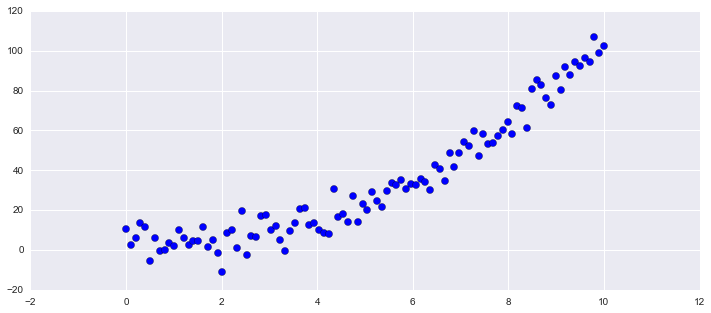

In [3]:
np.random.seed(0)
X = np.linspace(0,10,100)
y = X**2 + np.random.normal(scale=6, size=100)
plt.figure(figsize=(12,5))
plt.scatter(X,y, s=50)

## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X[:,None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
data = pd.DataFrame()
data['X'] = X
data['y'] = y

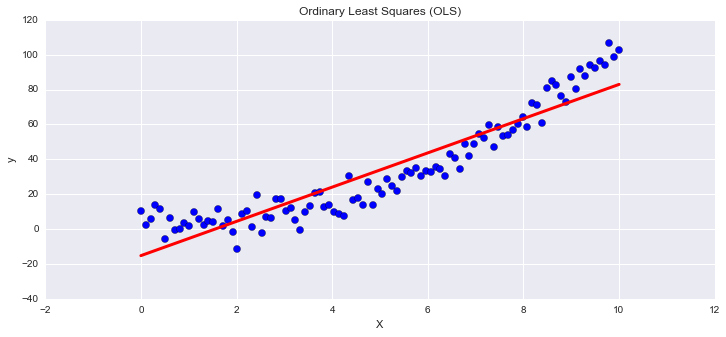

In [6]:
plt.figure(figsize=(12,5))
plt.scatter(X[:,None],y, s=50)
plt.plot(X[:,None],reg.predict(X[:,None]), linewidth=3,c='r')
plt.xlabel('X'); plt.ylabel('y')
plt.title('Ordinary Least Squares (OLS)')

In [7]:
print 'Score: '+str(reg.score(X[:,None], y))

Score: 0.863139798293


In [8]:
ec = 'y(x) = '+ str(reg.intercept_) + ' + ' + str(reg.coef_[0]) + 'x';
ec

'y(x) = -15.2474878113 + 9.82160388123x'

## Polynomial Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# Crear transformador polinómico
poly2 = PolynomialFeatures(degree=2)

In [11]:
# Ajustar y Expandir a orden 2 (x1*x1)
X2 = poly2.fit_transform(X[:,None])

In [12]:
# Aplicar Regresion Lineal normal sobre los datos transformados
reg2 = LinearRegression();
reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
def plot_figure():
    plt.figure(figsize=(12,5))
    plt.scatter(X,y, s=50, linewidths=1)
    plt.plot(X[:,None],reg.predict(X[:,None]), linewidth=3,c='r', label='lineal')
    plt.plot(X[:,None],reg2.predict(X2), linewidth=3,c='m', label='poly 2')
    plt.xlabel('X'); plt.ylabel('y'); plt.legend(); plt.title('Polynomial Regression');

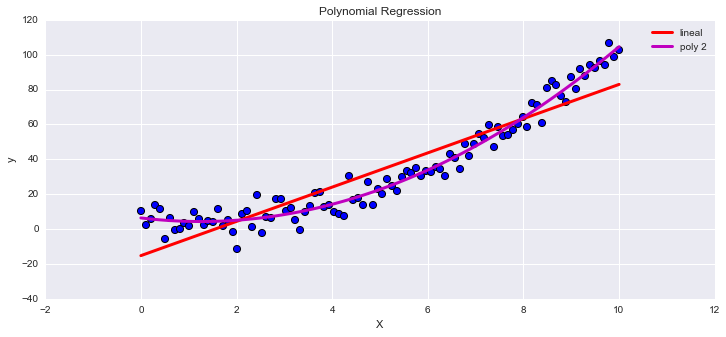

In [14]:
plot_figure()

In [15]:
print 'Score: '+str(reg2.score(X2, y))

Score: 0.967672868473


In [16]:
ec = 'y(x) = '+ str(reg2.intercept_) +' + '+ str(reg2.coef_[0]) + 'x + ' + str(reg2.coef_[1])+'x^2';
ec

'y(x) = 6.37850367288 + 0.0x + -3.28639503875x^2'